In [5]:
import numpy as np
import math
import pandas as pd
from pandas import DataFrame
import os
import matplotlib.pyplot as plt
import netCDF4
import datetime
from datetime import datetime, timedelta
from netCDF4 import num2date, date2num
import xarray as xr
from netCDF4 import Dataset
from numpy.random import uniform
import glob
from scipy.optimize import curve_fit
import os
from pathlib import Path


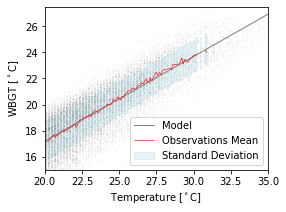

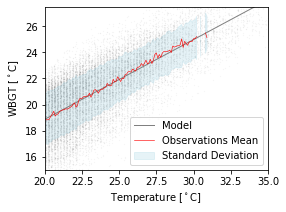

In [7]:
#data from meteosuisse, the wbgt and wbgt in the sun have already been calculated using the R package heat stress

hs = pd.read_csv("../data/stations_heatstress.csv") 
hs = hs.drop(columns='Unnamed: 0')

s='all' #all station   
hs_20 = hs[(hs.temp > 20)] #only keep temperatures above 20 degrees


hs_20 = hs_20.dropna() #get rid of missing values

hs_20_fit = np.polyfit(hs_20.temp, hs_20.wbgt,1) #get a linear fit
hs_20_fit_sun = np.polyfit(hs_20.temp, hs_20.wbgt_sun,1) #get a linear fit


T_to_WBGT = np.poly1d(hs_20_fit) #linear fit
T_to_WBGT_sun = np.poly1d(hs_20_fit_sun)


max_T = np.max(hs_20.temp)
max_T_sun = np.max(hs_20.temp)


min_T = 20

T = np.arange(min_T,max_T,0.1)
sd = np.zeros(len(T))    
mean = np.zeros(len(T))

sd_sun = np.zeros(len(T))    
mean_sun = np.zeros(len(T))



for t in range(len(T)):
    temp = round(T[t],1) #round temperatures to 1 decimal value

    wbgt = hs_20.wbgt[hs_20.temp==temp]
    wbgt_sun = hs_20.wbgt_sun[hs_20.temp==temp]

    if len(wbgt) > 40: #only take the standard deviation when enough points exist for a certain wbgt
        sd[t] = np.std(wbgt)
        mean[t] = np.mean(wbgt)

    else:
        sd[t] = "nan" 
        mean[t] = "nan"


    if len(wbgt_sun)>40:    

        sd_sun[t] = np.std(wbgt_sun)
        mean_sun[t] = np.mean(wbgt_sun)

    else:
        sd_sun[t] = "nan"
        mean_sun[t] = "nan"    

sd_mean=np.nanmean(sd) #mean of the standard deviations ignoring nans
sd_mean_sun=np.nanmean(sd_sun)



fig,ax = plt.subplots(1,1,figsize=(4,3))

ax.scatter (hs_20.temp, hs_20.wbgt, s=0.1,color='k', alpha=0.05,label='_nolegend_')

ax.fill_between(T,T_to_WBGT(T)-sd,T_to_WBGT(T)+sd,color="lightblue",alpha=0.3,label="Standard Deviation")
    
ax.plot (T, T_to_WBGT(T),color="gray", label="Model",linewidth=1)

ax.plot (T, mean,color="red", label="Observations Mean",linewidth=0.6)
ax.legend()
ax.set_xlim([20,35])
ax.set_ylim([15,27.5])
ax.set_xlabel("Temperature [$^\circ$C]")
ax.set_ylabel('WBGT [$^\circ$C]')

plt.savefig('../figures/t_vs_wbgt.pdf',bbox_inches='tight')


fig,ax = plt.subplots(1,1,figsize=(4,3))

ax.scatter (hs_20.temp, hs_20.wbgt_sun, s=0.1,color='k', alpha=0.05,label='_nolegend_')

ax.fill_between(T,T_to_WBGT_sun(T)-sd_sun,T_to_WBGT_sun(T)+sd_sun,color="lightblue",alpha=0.3,label="Standard Deviation")
    
ax.plot (T, T_to_WBGT_sun(T),color="gray", label="Model",linewidth=1)

ax.plot (T, mean_sun,color="red", label="Observations Mean",linewidth=0.6)
ax.legend()
ax.set_xlim([20,35])
ax.set_ylim([15,27.5])
ax.set_xlabel('Temperature [$^\circ$C]')
ax.set_ylabel('WBGT [$^\circ$C]')

plt.savefig('../figures/t_vs_wbgt_sun.pdf',bbox_inches='tight')
  
  